### Importing Libraries

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam

### Creating a datagenerator to load the data

In [88]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   
                                   validation_split = .2)

test_datagen = ImageDataGenerator(rescale=1./255,)

In [89]:
spiral_path = "/Users/praksj/Documents/VIT/Year-4/Sem 7/Cogntive Systems CSE4059/j comp/notebooks/archive/spiral"
training_set = train_datagen.flow_from_directory(spiral_path + '/training',
                                       target_size=(128, 128),
                                                batch_size=4,
                                     class_mode='binary',
                                                 subset = 'training'
                                            )

validation_set = train_datagen.flow_from_directory(spiral_path + '/training',
                                       target_size=(128, 128),
                                                batch_size=4,
                                     class_mode='binary',
                                                 subset = 'validation'
                                            )
test_set = test_datagen.flow_from_directory(spiral_path + '/testing',
                                        target_size=(128, 128),
                                                 batch_size=4,
                                      class_mode='binary',
                                               shuffle = False,
                                           )


Found 58 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


### Plot function

In [90]:
import matplotlib.pyplot as plt
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'val'], loc = "lower right")
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['train', 'val'], loc = "lower right")
    plt.show()
    
    accuracy = round(history.history['accuracy'][-1],4)
    validation_accuracy = round(history.history['val_accuracy'][-1],4)
    return (accuracy, validation_accuracy)

### Building a basic CNN

In [91]:
basic_cnn = Sequential()
basic_cnn.add(Conv2D(64,kernel_size =(3,3) ,input_shape=(128, 128,3), activation = 'relu'))
basic_cnn.add(MaxPooling2D(3,3))
basic_cnn.add(Conv2D(32, kernel_size = (3,3),activation = 'relu'))
basic_cnn.add(Flatten())
basic_cnn.add(Dense(16, activation = 'relu'))
basic_cnn.add(Dense(1, activation = 'sigmoid'))
basic_cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
basic_cnn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 42, 42, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 40, 40, 32)        18464     
                                                                 
 flatten_20 (Flatten)        (None, 51200)             0         
                                                                 
 dense_38 (Dense)            (None, 16)                819216    
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                     

In [92]:
hist_cnn =basic_cnn.fit(training_set,validation_data = validation_set,epochs = 50, )

Epoch 1/50


2023-10-10 18:53:59.928760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 1s 52ms/step - loss: 1.8694 - accuracy: 0.5345 - val_loss: 1.8737 - val_accuracy: 0.5000
Epoch 2/50


2023-10-10 18:54:00.760360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 0s 20ms/step - loss: 2.2201 - accuracy: 0.5000 - val_loss: 2.3336 - val_accuracy: 0.5000
Epoch 3/50
15/15 [==============================] - 0s 18ms/step - loss: 2.3356 - accuracy: 0.5000 - val_loss: 2.1785 - val_accuracy: 0.5000
Epoch 4/50
15/15 [==============================] - 0s 17ms/step - loss: 2.0671 - accuracy: 0.5000 - val_loss: 1.8527 - val_accuracy: 0.5000
Epoch 5/50
15/15 [==============================] - 0s 17ms/step - loss: 1.7205 - accuracy: 0.5000 - val_loss: 1.5067 - val_accuracy: 0.5000
Epoch 6/50
15/15 [==============================] - 0s 17ms/step - loss: 1.3832 - accuracy: 0.5000 - val_loss: 1.2070 - val_accuracy: 0.5000
Epoch 7/50
15/15 [==============================] - 0s 18ms/step - loss: 1.0957 - accuracy: 0.5000 - val_loss: 0.9867 - val_accuracy: 0.5000
Epoch 8/50
15/15 [==============================] - 0s 17ms/step - loss: 0.9119 - accuracy: 0.5000 - val_loss: 0.8206 - val_accuracy: 0.5000
Epoch 9/50
15/15 [======

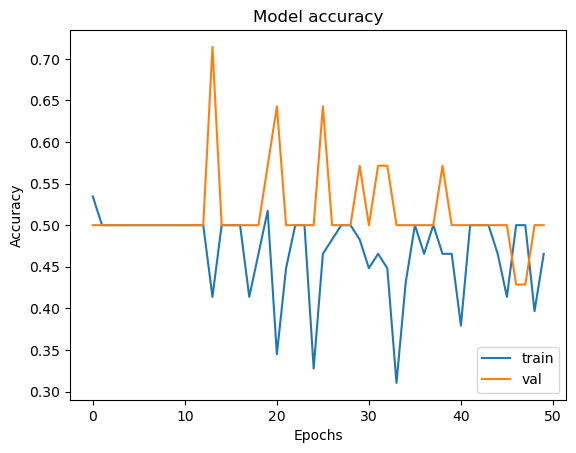

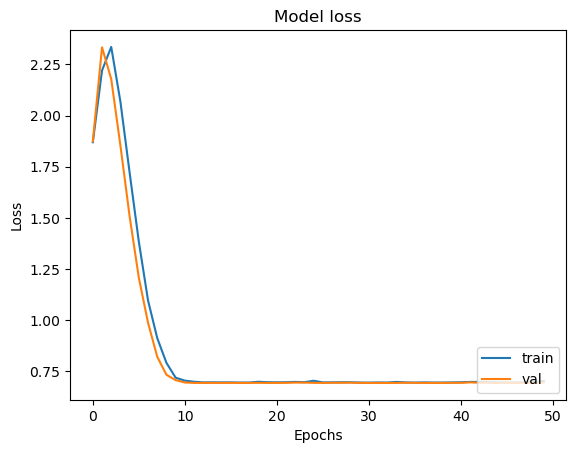

(0.4655, 0.5)

In [93]:
plot(hist_cnn)

In [94]:
basic_cnn.evaluate(test_set)

8/8 [==============================] - 0s 8ms/step - loss: 0.6953 - accuracy: 0.5000


[0.6953243017196655, 0.5]

<b> The basic CNN model is not able to predict well on the given spiral image drawings

### Mobile Net

In [95]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input

mobilenet = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
for layer in mobilenet.layers:
    layer.trainable = False

In [96]:
from tensorflow.keras.models import Model


x = Flatten()(mobilenet.output)
x = Dense(32, activation='relu')(x)
x= Dense(1, activation='sigmoid')(x)  # Replace num_classes with the number of classes in your task
mobilenet_model = Model(inputs=mobilenet.input, outputs=x)

In [97]:
mobilenet_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])
mobilenet_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_6[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 64, 64, 32)           0         ['bn_Conv1[0][0]']      

In [98]:
hist_mobilenet =mobilenet_model.fit(training_set,validation_data = validation_set,epochs = 10, )

Epoch 1/10


2023-10-10 18:54:16.557648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/15 [=======================>......] - ETA: 0s - loss: 6.2283 - accuracy: 0.5870

2023-10-10 18:54:18.751303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 5s 172ms/step - loss: 5.6708 - accuracy: 0.6034 - val_loss: 2.5376 - val_accuracy: 0.7143
Epoch 2/10
15/15 [==============================] - 1s 41ms/step - loss: 1.7863 - accuracy: 0.6724 - val_loss: 2.2473 - val_accuracy: 0.7857
Epoch 3/10
15/15 [==============================] - 0s 32ms/step - loss: 1.6335 - accuracy: 0.6724 - val_loss: 0.4977 - val_accuracy: 0.7143
Epoch 4/10
15/15 [==============================] - 0s 32ms/step - loss: 0.7311 - accuracy: 0.8103 - val_loss: 0.3807 - val_accuracy: 0.7857
Epoch 5/10
15/15 [==============================] - 1s 34ms/step - loss: 0.5582 - accuracy: 0.7759 - val_loss: 0.2774 - val_accuracy: 0.7857
Epoch 6/10
15/15 [==============================] - 0s 32ms/step - loss: 0.4413 - accuracy: 0.7931 - val_loss: 0.2054 - val_accuracy: 0.8571
Epoch 7/10
15/15 [==============================] - 0s 20ms/step - loss: 0.2760 - accuracy: 0.8448 - val_loss: 0.1280 - val_accuracy: 0.9286
Epoch 8/10
15/15 [=====

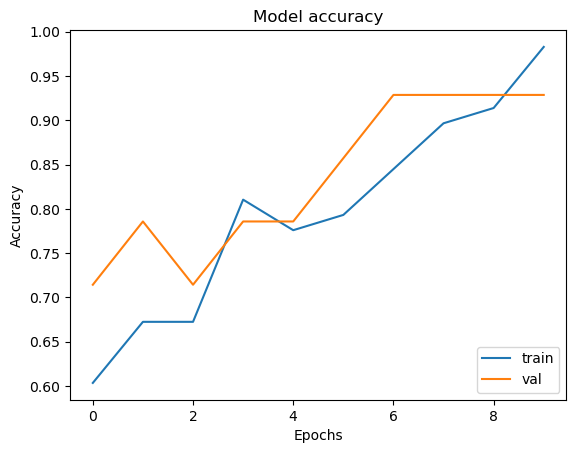

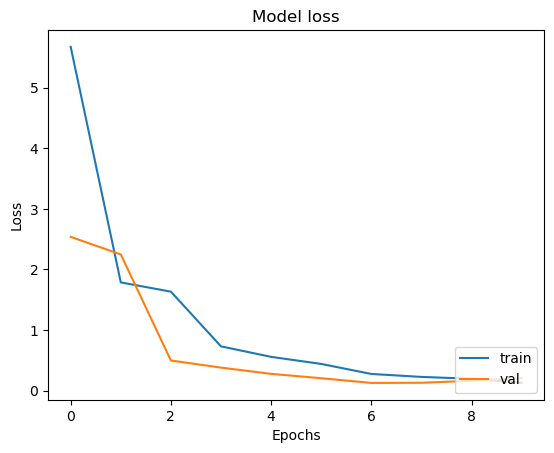

(0.9828, 0.9286)

In [99]:
plot(hist_mobilenet)

In [108]:
mobilenet_model.evaluate(test_set)

8/8 [==============================] - 0s 19ms/step - loss: 0.8377 - accuracy: 0.8000


[0.8376817107200623, 0.800000011920929]

<b> Mobilenet performed very well and gave a testing accuracy of 80%.

### Resenet50

In [101]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [102]:
resnet =ResNet50(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
for layer in resnet.layers:
    layer.trainable = False

In [103]:
x = Flatten()(resnet.output)
x = Dense(32, activation='relu')(x)
x= Dense(1, activation='sigmoid')(x)  # Replace num_classes with the number of classes in your task
resnet_model = Model(inputs=resnet.input, outputs=x)

In [104]:
resnet_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])
resnet_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_7[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [105]:
hist_resnet =resnet_model.fit(training_set,validation_data = validation_set,epochs = 40, )

Epoch 1/40


2023-10-10 18:54:26.553930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 0.9307 - accuracy: 0.5172

2023-10-10 18:54:29.272754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 6s 251ms/step - loss: 0.9307 - accuracy: 0.5172 - val_loss: 0.6633 - val_accuracy: 0.6429
Epoch 2/40
15/15 [==============================] - 1s 42ms/step - loss: 0.6984 - accuracy: 0.6034 - val_loss: 0.5831 - val_accuracy: 0.7143
Epoch 3/40
15/15 [==============================] - 1s 47ms/step - loss: 0.6256 - accuracy: 0.6379 - val_loss: 0.6248 - val_accuracy: 0.6429
Epoch 4/40
15/15 [==============================] - 1s 34ms/step - loss: 0.6581 - accuracy: 0.6034 - val_loss: 0.6528 - val_accuracy: 0.7143
Epoch 5/40
15/15 [==============================] - 1s 34ms/step - loss: 0.5822 - accuracy: 0.7241 - val_loss: 0.7269 - val_accuracy: 0.5000
Epoch 6/40
15/15 [==============================] - 0s 25ms/step - loss: 0.5814 - accuracy: 0.6897 - val_loss: 0.7317 - val_accuracy: 0.5000
Epoch 7/40
15/15 [==============================] - 0s 30ms/step - loss: 0.5307 - accuracy: 0.8103 - val_loss: 0.7424 - val_accuracy: 0.3571
Epoch 8/40
15/15 [=====

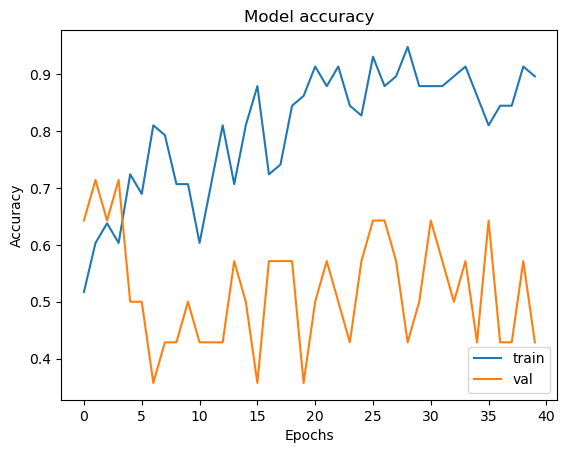

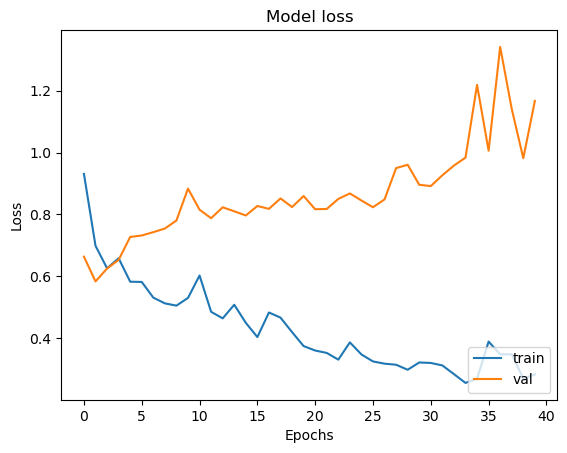

(0.8966, 0.4286)

In [106]:
plot(hist_resnet)

In [107]:
resnet_model.evaluate(test_set)

8/8 [==============================] - 0s 17ms/step - loss: 0.5858 - accuracy: 0.7000


[0.5858431458473206, 0.699999988079071]

<b>Resnet peforms well with a test accuracy of 70%

### Saving models

In [110]:
resnet_model.save('spiral_resnet.h5')
mobilenet_model.save('spiral_mobilenet.h5')
basic_cnn.save('spiral_cnn.h5')